In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helper import *
from sdlbfgs import *

In [8]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### Fashion MNIST dataset
The Fashion MNIST dataset is loaded.

In [15]:
trainset = datasets.FashionMNIST('', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw



Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw


Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw


Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw
Processing...
Done!


Extracting PATH_TO_STORE_TESTSET/FashionMNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/FashionMNIST/raw





Extracting PATH_TO_STORE_TESTSET/FashionMNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/FashionMNIST/raw


Extracting PATH_TO_STORE_TESTSET/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/FashionMNIST/raw


Extracting PATH_TO_STORE_TESTSET/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/FashionMNIST/raw
Processing...
Done!


In [16]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


print(valloader)
len(valloader)

64 images in each batch and each image has a dimension of 28 x 28 pixels


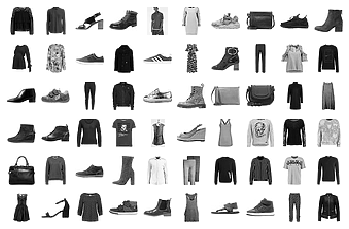

In [17]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# SGD learning rate optimization 



### Fully connected network

In [20]:
grid =[ 1e-3, 1e-2, 1e-1,  0.5]


In [23]:
epochs = 30
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =learning_rate_optimization_SGD(input_size, output_size, trainloader, valloader, grid,epochs)

y = 0.8621
Number Of Images Tested = 60000
Model Accuracy = 0.8837166666666667
Test loss: 0.38158798996050647 

Epoch 13
Training loss: 0.3298486104127822
Number Of Images Tested = 10000
Model Accuracy = 0.8616
Number Of Images Tested = 60000
Model Accuracy = 0.8777666666666667
Test loss: 0.3977540364121176 

Epoch 14
Training loss: 0.32293464781156483
Number Of Images Tested = 10000
Model Accuracy = 0.8681
Number Of Images Tested = 60000
Model Accuracy = 0.8885833333333333
Test loss: 0.3735691932546105 

Epoch 15
Training loss: 0.3172126036526552
Number Of Images Tested = 10000
Model Accuracy = 0.8672
Number Of Images Tested = 60000
Model Accuracy = 0.8873333333333333
Test loss: 0.3763901434696404 

Epoch 16
Training loss: 0.3129560142390128
Number Of Images Tested = 10000
Model Accuracy = 0.8694
Number Of Images Tested = 60000
Model Accuracy = 0.8902166666666667
Test loss: 0.3672207864416633 

Epoch 17
Training loss: 0.3060253583101321
Number Of Images Tested = 10000
Model Accuracy =

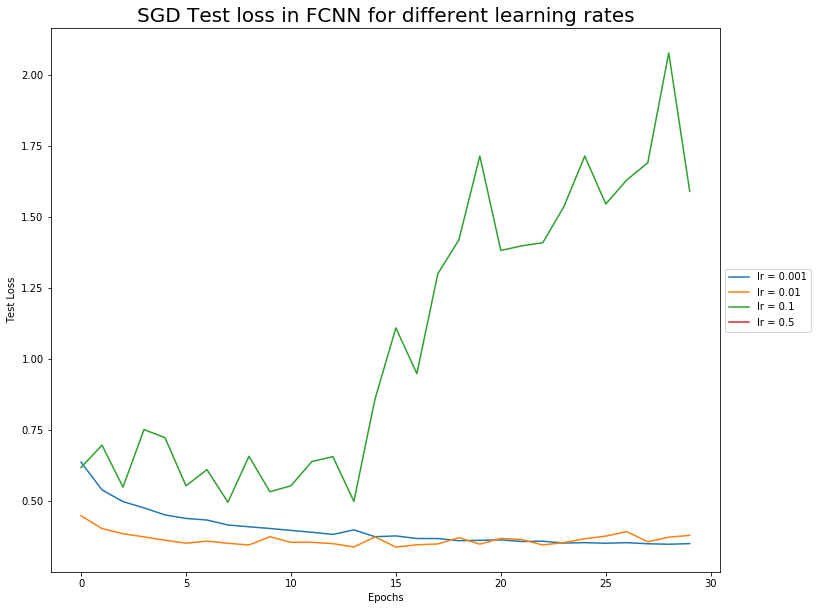

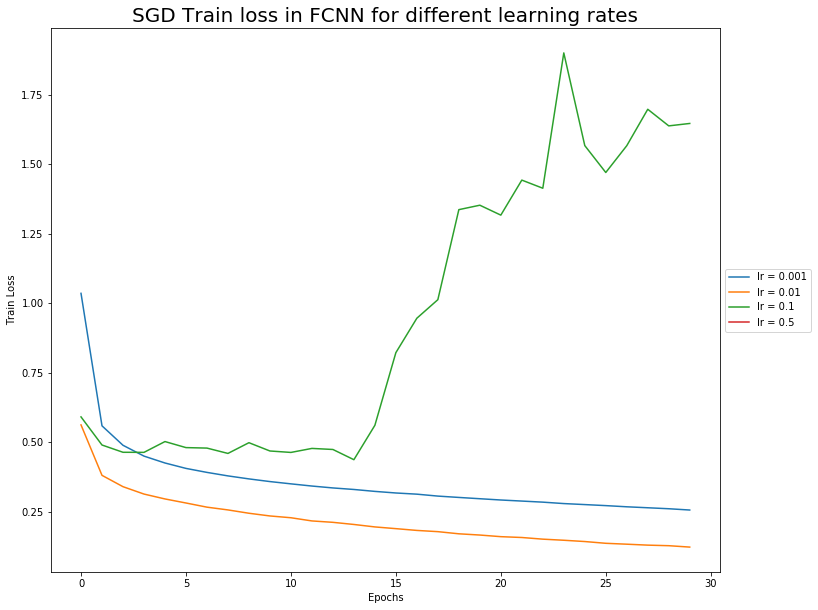

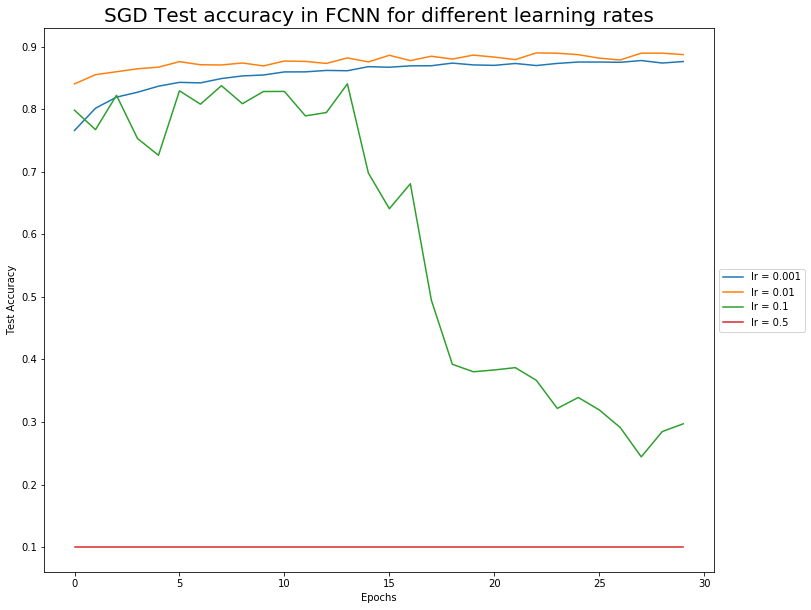

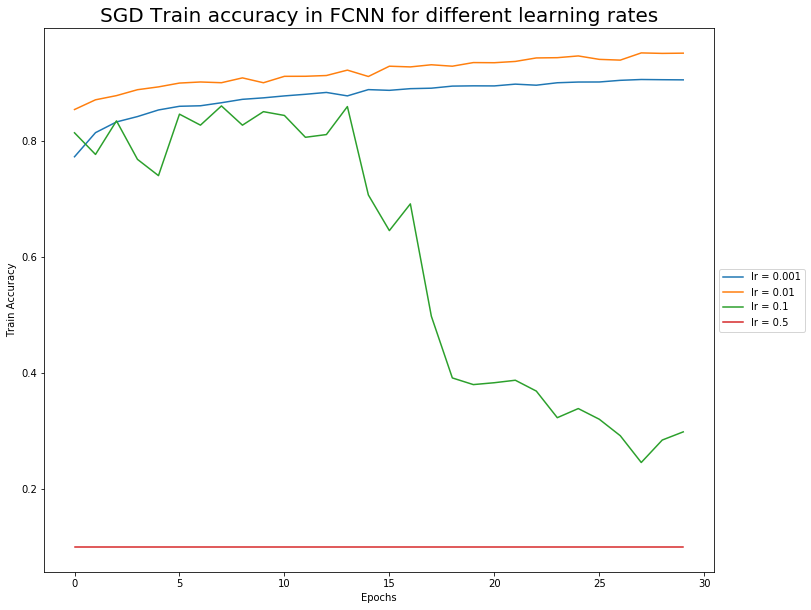

In [24]:

for index,lr in enumerate(grid):
  plt.figure(1, figsize = (12,10))
  plt.plot(test_loss_fcnn[index],label='lr = {}'.format(lr))
  plt.figure(2, figsize = (12,10))
  plt.plot(training_loss_fcnn[index],label='lr = {}'.format(lr))
  plt.figure(3, figsize = (12,10))
  plt.plot(test_accuracy_fcnn[index],label='lr = {}'.format(lr))
  plt.figure(4, figsize = (12,10))
  plt.plot(training_accuracy_fcnn[index],label='lr = {}'.format(lr))
  
plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SGD Test loss in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SGD Train loss in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SGD Test accuracy in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SGD Train accuracy in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("train_acc_fcnn.jpg")

In [25]:
np.savetxt('SGD_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('SGD_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('SGD_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('SGD_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('SGD_fcNN_times.txt',time_fcnn)

### CNN

In [30]:
epochs = 30

grid =[ 1e-3,1e-2]

training_loss_cnn, test_loss_cnn,training_accuracy_cnn, test_accuracy_cnn,time_cnn =learning_rate_optimization_SGD_CNN(input_size, output_size, trainloader, valloader, grid,epochs)

Learning rates to try: [0.001, 0.01]
Epoch 0
Training loss: 0.8562921984617644
Number Of Images Tested = 10000
Model Accuracy = 0.7973
Number Of Images Tested = 60000
Model Accuracy = 0.80575
Test loss: 0.549153187851997 

Epoch 1
Training loss: 0.4708329737186432
Number Of Images Tested = 10000
Model Accuracy = 0.8387
Number Of Images Tested = 60000
Model Accuracy = 0.84625
Test loss: 0.45047462413645095 

Epoch 2
Training loss: 0.40482548378042577
Number Of Images Tested = 10000
Model Accuracy = 0.8482
Number Of Images Tested = 60000
Model Accuracy = 0.8587333333333333
Test loss: 0.4234157084089935 

Epoch 3
Training loss: 0.37143059475208395
Number Of Images Tested = 10000
Model Accuracy = 0.851
Number Of Images Tested = 60000
Model Accuracy = 0.8586
Test loss: 0.4134172783915404 

Epoch 4
Training loss: 0.3450422813770359
Number Of Images Tested = 10000
Model Accuracy = 0.8715
Number Of Images Tested = 60000
Model Accuracy = 0.8827666666666667
Test loss: 0.3563684989122828 

Epoch 

In [ ]:

for index,lr in enumerate(grid):
  plt.figure(1, figsize = (12,10))
  plt.plot(test_loss_cnn[index],label='lr = {}'.format(lr))
  plt.figure(2, figsize = (12,10))
  plt.plot(training_loss_cnn[index],label='lr = {}'.format(lr))
  plt.figure(3, figsize = (12,10))
  plt.plot(test_accuracy_fnn[index],label='lr = {}'.format(lr))
  plt.figure(4, figsize = (12,10))
  plt.plot(training_accuracy_cnn[index],label='lr = {}'.format(lr))
  
plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SGD Test loss in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SGD Train loss in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SGD Test accuracy in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SGD Train accuracy in FCNN for different learning rates',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("train_acc_fcnn.jpg")

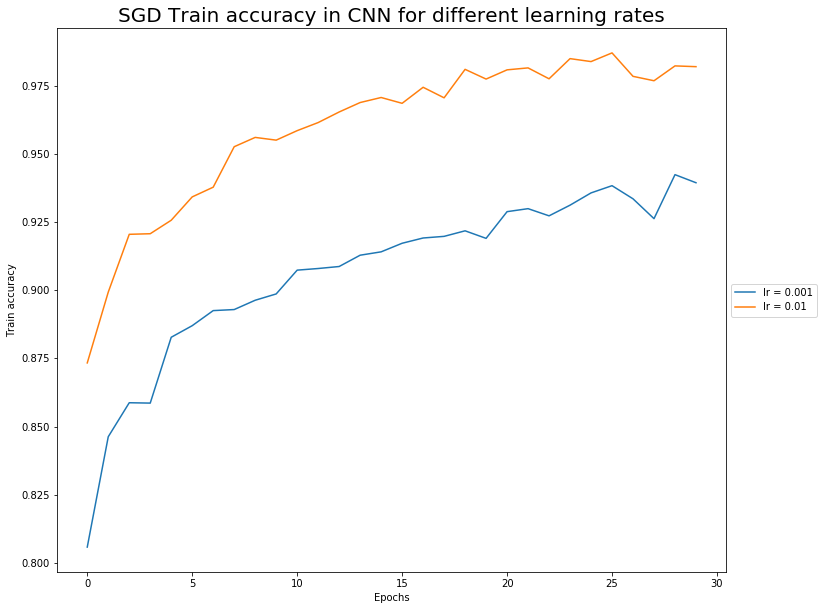

In [48]:
for index,lr in enumerate(grid):
  plt.figure(1, figsize = (12,10))
  plt.plot(test_accuracy_cnn[index],label='lr = {}'.format(lr))
plt.xlabel('Epochs')
plt.ylabel('Test accuracy')
plt.title('SGD Test accuracy in CNN for different learning rates', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.savefig("test_accuracy_cnn.jpg")  
 

In [36]:
np.savetxt('SGD_CNN_trainloss.txt', training_loss_cnn)
np.savetxt('SGD_CNN_testloss.txt', test_loss_cnn)
np.savetxt('SGD_CNN_trainacc.txt', training_accuracy_cnn)
np.savetxt('SGD_CNN_testacc.txt', test_accuracy_cnn)
np.savetxt('SGD_CNN_times.txt',time_cnn)